<<< LifeServe Blood Institute >>>
Loading database...
Enter the database file names without .txt extension
or just press Enter to accept defaults 
Donors Database (donors) :donors_tc3
Stock inventory database (bags):bags_tc3
------------
Main Menu
------------ 
(1) Check inventory
(2) Attend to blood demand
(3) Record new donation
(4) Stock visual report
(5) Exit
Enter your choice: 1
Following bags are out of their use-by date
2274
2367
2456
2457
2458
2479
2478
Please dispose them of. Press enter when done... 

Updated database files saved to disk. 
------------
Main Menu
------------ 
(1) Check inventory
(2) Attend to blood demand
(3) Record new donation
(4) Stock visual report
(5) Exit
Enter your choice: 2
Currently AB+ blood is required. 
Checking the stock inventory... 
Following bag should be supplied
ID: 2473 (O-)
Press enter once it is packed for dispatch... 

Inventory records updated.
Updated database files saved to disk.
------------
Main Menu
------------ 
(1) Check inventor

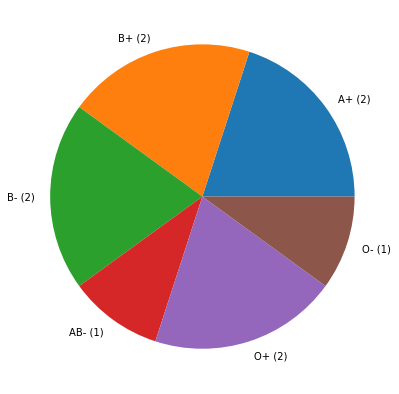

------------
Main Menu
------------ 
(1) Check inventory
(2) Attend to blood demand
(3) Record new donation
(4) Stock visual report
(5) Exit
Enter your choice: 5
Have a Good day !!


In [1]:
# Preliminary Steps 
# dictionary and file saving and file opening
from hospital import check_demand

# Required Header files
from matplotlib import pyplot as plt
from datetime import date


# For assigning new id's
curr_donor_id = 0
curr_bag_id=0

# Dictionary with key as donor_id or bag_id and value as a list of strings storing all the other information
donor_dict={}
stock_dict={}

# Dictionary with key as blood group and value as list of either donor_id's with that blood group Or bag_id's
blg_donor={}
blg_stock={}
blgroups = ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-', 'X']

# Assigning empty lists to all blood groups (for both donor and bags)
for item in blgroups :
    blg_donor[item]=[]
    blg_stock[item]=[]
    
def max(a,b):
    if(a>b):
        return a
    else:
        return b
    
# Blood Compatibility matrix 
blood_compat={'O-':['O-'],'O+':['O-','O+'],'B-':['O-','B-'],'B+':['O-','B-','B+','O+'],'A-':['O-','A-'],
              'A+':['O-','A-','A+','O+'],'AB-':['A-','O-','B-','AB-'],'AB+':['O-','B-','B+','O+','A-','A+','AB+','AB-']
             }
# loading the database from files(paramaters) in a dictionary 
def load_db(donor_fname,stock_fname):
    donor_file = open(donor_fname,"r")
    stock_file = open(stock_fname,"r")
    # Curr_donor_id and Curr_bag_id stores the maximum id's possible  
    global curr_donor_id
    global curr_bag_id 
    for line in donor_file:
        list1 = line.split(',')
        if(len(list1)!=6) :
            return False
        donor_dict[list1[0]]=list1
        curr_donor_id=max(curr_donor_id,1+int(list1[0]))
        blg_donor[list1[4]].append(list1[0])
    for line in stock_file :
        list1 = line.split(',')
        if(len(list1)!=3) :
            return False
        curr_bag_id = max(curr_bag_id,1+int(list1[0]))
        blg_stock[list1[1]].append(list1[0])
        stock_dict[list1[0]]=list1
    donor_file.close()
    stock_file.close()
    return True
    
# Saving the dictionary in a file provided as parameters    
def save_db(donor_fname,stock_fname):
    donor_file = open(donor_fname,"w")
    stock_file = open(stock_fname,"w")
    for key in donor_dict :
        line_join = ",".join(donor_dict[key])
        donor_file.write(line_join)
    for key in stock_dict :
        line_join = ",".join(stock_dict[key])
        stock_file.write(line_join)
    donor_file.close()
    stock_file.close()
    
 # Defining  Main Menu functions


########## Function 1) ################
# Checking if there are any older bags or not
def check_inventory(donor_file,stock_file):
    print("Following bags are out of their use-by date")
    cnt=0
    older_bags = []
    for key in stock_dict:
        some_date = stock_dict[key][2][0:10]
        some_date = date.fromisoformat(some_date)
        today = date.today()
        days_diff = (today-some_date).days
        if(days_diff>30):
            cnt += 1
            print(key)
            older_bags.append(key)
    for deletion in older_bags:
        blg_stock[stock_dict[deletion][1]].remove(deletion)
        del stock_dict[deletion]
    if(cnt==0):
        print("There are no bags which are older than 30 days. So No need to dispose anything")
    else :
        print("Please dispose them of. Press enter when done... ")
        noth = input()
        save_db(donor_file,stock_file)
        print("Updated database files saved to disk. ")
        

########## Function 2) ################       
# Pay attention to demand from hospital.py module (simulation of a hospital server)
def attend_to_demand(donor_file,stock_file):
    blood_group = check_demand()
    # If X comes report errors
    if(blood_group=='X') :
        print("Could not connect to hospital web server.\nPlease try again after some time. ")
        return
    print("Currently " + blood_group + " blood is required. ")
    print("Checking the stock inventory... ")
    # check blood compatibilty in stock
    for compatible_blg in blood_compat[blood_group] :
        # If any compatible data type is found in stock (bags)
        if(len(blg_stock[compatible_blg])>0):
            print("Following bag should be supplied")
            donate = blg_stock[compatible_blg][0]
            print("ID: "+ donate+ " (" + compatible_blg + ")")
            print("Press enter once it is packed for dispatch... ")
            noth=input()
            blg_stock[compatible_blg].remove(donate)
            del stock_dict[donate]
            save_db(donor_file,stock_file)
            print("Inventory records updated.")
            print("Updated database files saved to disk.") 
            return 
    
    # If there is no compatible data types in bag
    compatible_donors={}
    print("We can not meet the requirement. Checking the donor database...")
    for compatible_blg in blood_compat[blood_group] :
        for eligible_donor_id in blg_donor[compatible_blg] :
            list1=donor_dict[eligible_donor_id]
            compatible_donors[eligible_donor_id]="•" + list1[1]+", "+list1[2]+", "+list1[3]
    
    # If length of donors is 0
    if(len(compatible_donors)==0) :
        print("There are no available donors")
    else :
        print("\nFollowing donors match the requirements. Please contact them for new donation.")
        for eligible_donor_id in compatible_donors:
            print(compatible_donors[eligible_donor_id])

            
########## Function 3) ################
# Adding a new bag from donor
def record_donation(donor_file,stock_file):
    don_id=input("Enter the donor's unique ID: ")
    
    # if donor_id does not exist
    if don_id not in donor_dict :
        print("That ID does not exist in the database.")
        print("To register a new donor, please contact the system administrator.")
        return 
    today = date.today()
    
    # if donor is not eligible
    some_date = donor_dict[don_id][5][0:10]
    some_date = date.fromisoformat(some_date)
    days_diff = (today-some_date).days
    
    global curr_donor_id
    global curr_bag_id 
    
    if(days_diff<120) :
        print("Sorry, this donor is not eligible for donation.")
        return 
    local_bag_id=curr_bag_id
    # if donor is eligilble
    today_date = str(today.strftime("%Y-%m-%d"))
    details = donor_dict[don_id]
    print("Recording a new donation with following details: ")
    print("From: " + details[1])
    print("Group: " + details[4])
    print("Date: " + today_date )
    print("Bag_ID: " + str(local_bag_id))
    yesno = input("Please confirm (y/n): ")
    
    # If no is pressed 
    if (yesno!='y') :
        if(yesno=='n'):
            print("Cancelled")
        else :
            print("Invalid Input. The process has been cancelled by default")
        return 
    
    # if yes is pressed 
    donor_dict[don_id][5] = today_date+'\n'
    stock_dict[str(curr_bag_id)]=[str(curr_bag_id),details[4],today_date+'\n']
    local_bag_id += 1
    curr_bag_id=local_bag_id
    save_db(donor_file,stock_file)
    print("Done. Donor's last donation date also updated to " + today_date)
    print("Updated database files saved to disk.")
    
    

########## Function 4) ################
# Pie Chart
def pie_chart(donor_file,stock_file):
    label = []
    data = []
    # iterating and finding distribution of donors excluding those with 0 
    for grup in blgroups :
        if(len(blg_donor[grup])>0) :
            label.append(grup + " (" + str(len(blg_donor[grup])) + ")")   
            data.append(int(len(blg_donor[grup])))
    if(len(label)==0):
        print("No Donors available Hence no Pie chart could be made")
        return
    print("Pie chart opens in a new window...\nClose the chart window to continue")
    # Creating plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(data, labels = label)

    # show plot
    plt.show()
# Full Structure of the program 
 
# Initial 
a = 0 
b = 0
donor_file="donors.txt"
stock_file="bags.txt"
while a!=1 or b!=1 :
    print("<<< LifeServe Blood Institute >>>\nLoading database...\nEnter the database file names without .txt extension")
    print("or just press Enter to accept defaults ")
    global donor_file
    global stock_file
    donor_file = input("Donors Database (donors) :")
    stock_file = input("Stock inventory database (bags):")
    if(len(donor_file)==0) :
        donor_file="donors"
    if(len(stock_file)==0)  :  
        stock_file="bags"
    donor_file+=".txt"
    stock_file+=".txt"
    # Checking if the donor file exists or not
    try:
        f = open(donor_file,"r")
        f.close()
        a = 1
    except IOError:
        print("Donors Database File does not exist!!!!!!!!!!\n Kindly provide the filenames again.\n\n\n")


    # Checking if the stock or bags file exists or not
    try:
        f = open(stock_file,"r")
        f.close()
        b = 1
    except IOError:
        print("Stock Inventory Database File does not exist!!!!!!!!!!\n Kindly provide the filenames again.")

# Loading the files 
if(load_db(donor_file,stock_file)):
    # Main Menu Options presented
    while (1) :
        print("------------\nMain Menu\n------------ ")
        print("(1) Check inventory")
        print("(2) Attend to blood demand")
        print("(3) Record new donation")
        print("(4) Stock visual report")
        print("(5) Exit")
        choice = (input("Enter your choice: ")) 
        if(choice!='1' and choice!='2' and choice!='3' and choice!='4' and choice!='5' ):
            print("Wrong Choice Entered.")
            continue
        choice = int(choice)    
        if(choice==1):
            check_inventory(donor_file,stock_file)
        if(choice==2):
            attend_to_demand(donor_file,stock_file)
        if(choice==3):
            record_donation(donor_file,stock_file)
        if(choice==4):
            pie_chart(donor_file,stock_file)
        if(choice==5):
            print("Have a Good day !!")
            break
else :
    # If database is not in the proper format given
    print("Corrupted Database!!!\nProgram is terminated!!!!")

val = input()
